# Ausreißer anhand Boxplot

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
# Umwandlung der Spalte "Sex" in nummerischen Wert
heartData["Sex"] = heartData["Sex"].apply(lambda x: 0 if x == "M" else 1)

# Umwandlung der Spalte "ST_Slope" in nummerischen Wert
heartData["ST_Slope"] = heartData["ST_Slope"].map({"Flat": 0, "Up": 1, "Down": 2})

heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,1,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,0,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,1,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,0,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,1,0


In [45]:
# Entfernen unangegebener Cholersterin Beobachtungen und Frauen
heartData = heartData[(heartData["Sex"] != "F") & (heartData["Cholesterol"] != 0)]

In [48]:
# Nummerische Attribute rausfiltern
numericFeatures = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "ST_Slope"]
numericHeartData = heartData.loc[:,numericFeatures].copy()

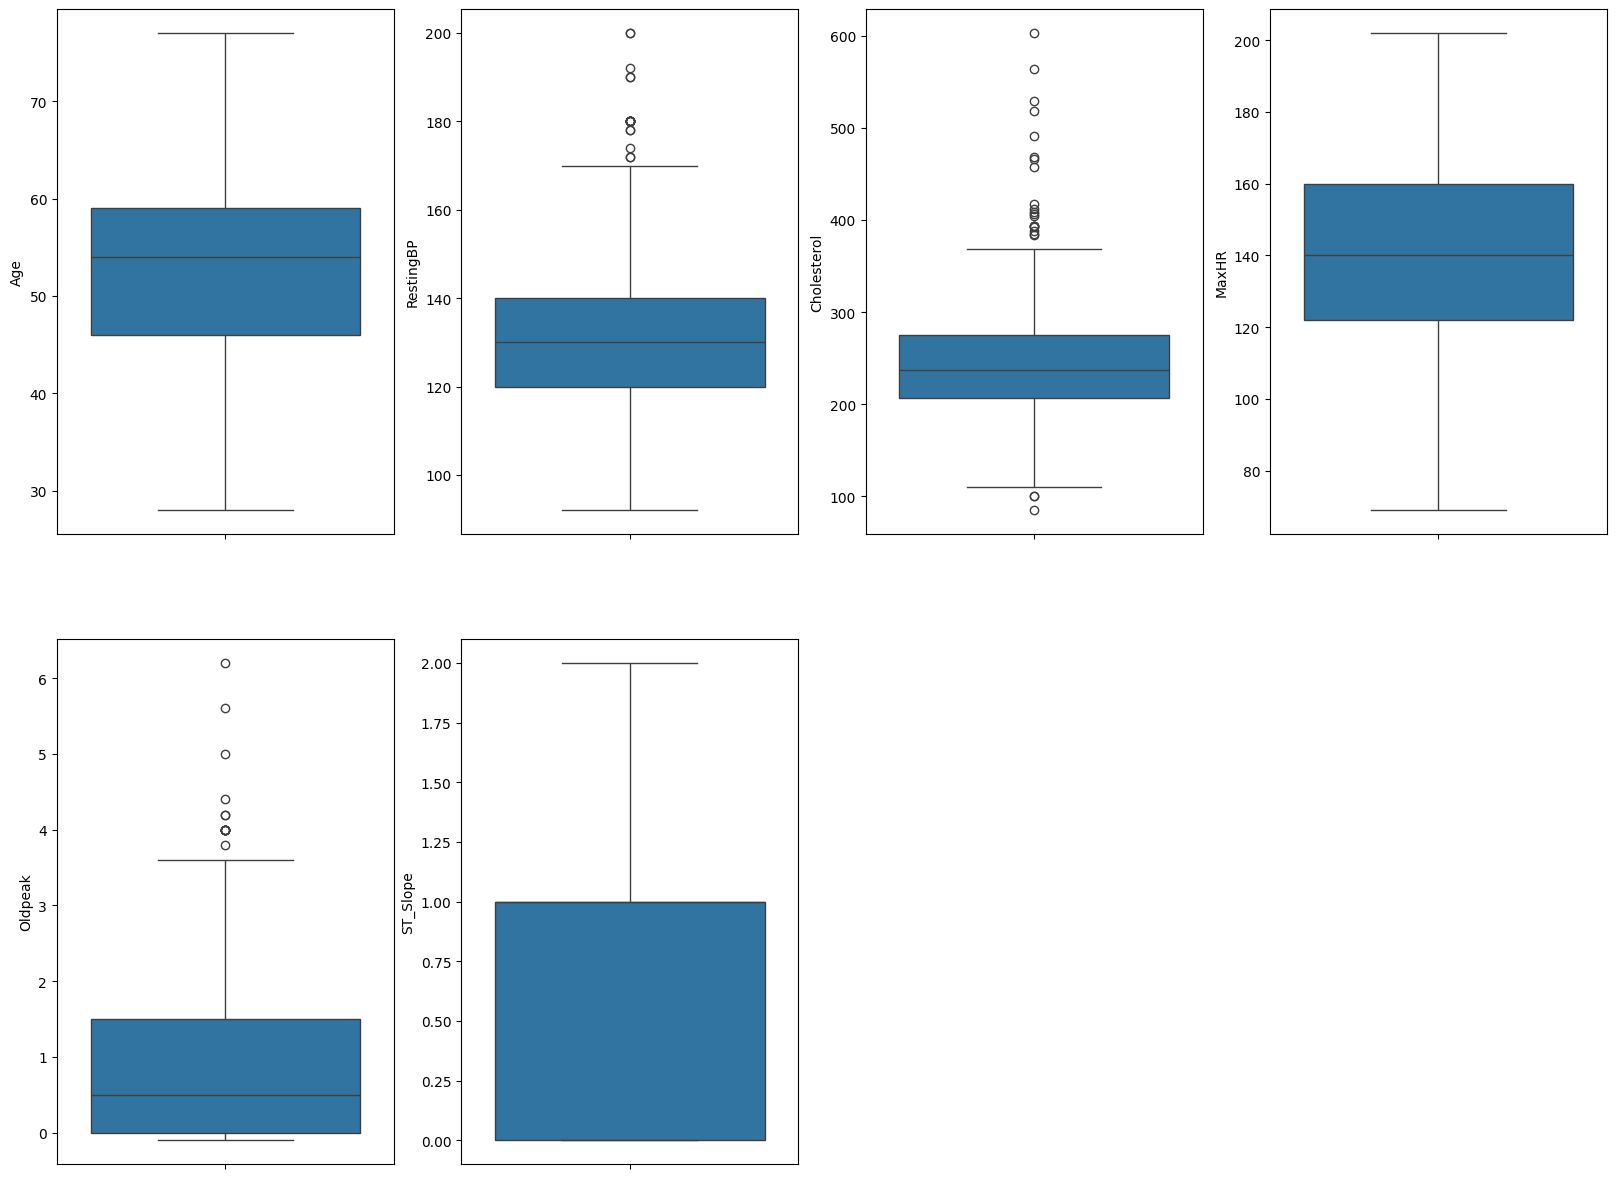

In [49]:
plt.figure(figsize=(20, 15))
for i in range(len(numericHeartData.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(numericHeartData[numericHeartData.columns[i]])
plt.show()

## Ausreißer
Anhand der Boxplots kann man Ausreißer dei den Attributen: RestingBP, Cholesterol und Oldpeak erkennen.